In [1]:
# Import the necessary modules
import tensorflow as tf
import sys
sys.path.append('model')
from unicycle import mnist_benchmark, mnist_tfutils, Unicycle
import matplotlib
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from random import randint
from utility_functions import fetch_node

In [2]:
# Import MNIST data
batch_size = 256

# mnist variable is an instance of the DataSet class.
mnist = input_data.read_data_sets("MNIST_data/")
mnist

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f0a32278410>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f0a94d2c110>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f09f29edf10>)

In [3]:
#check that the data is correct
print 'Number of training images with shape %s: %s' % \
    (list(np.shape(mnist.train.images)[1:]),np.shape(mnist.train.images)[0])
print 'Number of training labels: %s' % \
    (np.shape(mnist.train.labels)[0])
print
print 'Number of test images with shape %s: %s' % \
    (list(np.shape(mnist.test.images)[1:]),np.shape(mnist.test.images)[0])
print 'Number of test labels: %s' % \
    (np.shape(mnist.test.labels)[0])
print
print 'Number of validation images with shape %s: %s' % \
    (list(np.shape(mnist.validation.images)[1:]),np.shape(mnist.validation.images)[0])
print 'Number of validation labels: %s' % \
    (np.shape(mnist.validation.labels)[0])

Number of training images with shape [784]: 55000
Number of training labels: 55000

Number of test images with shape [784]: 10000
Number of test labels: 10000

Number of validation images with shape [784]: 5000
Number of validation labels: 5000


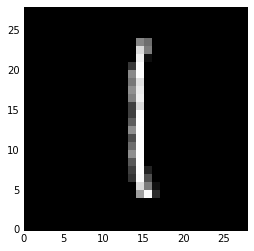

^ 1


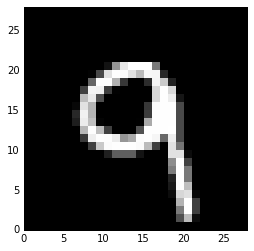

^ 9


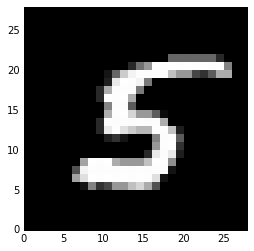

^ 5


In [4]:
#print out 3 examples of the data to really ensure it's correct
import numpy as NP
import matplotlib.pyplot as P
import matplotlib.ticker as MT
import matplotlib.cm as CM

def imagesc(W, pixwidth=1, ax=None, grayscale=True):
    """
    Do intensity plot, similar to MATLAB imagesc()
    W = intensity matrix to visualize
    pixwidth = size of each W element
    ax = matplotlib Axes to draw on 
    grayscale = use grayscale color map
    Rely on caller to .show()
    """
    # N = rows, M = column
    (N, M) = W.shape 
    # Need to create a new Axes?
    if(ax == None):
        ax = matplotlib.pyplot.figure().gca()
    # extents = Left Right Bottom Top
    exts = (0, pixwidth * M, 0, pixwidth * N)
    if(grayscale):
        ax.imshow(W,
                  interpolation='nearest',
                  cmap=matplotlib.cm.gray,
                  extent=exts)
    else:
        ax.imshow(W,
                  interpolation='nearest',
                  extent=exts)
        
    matplotlib.pyplot.show()
#     return ax


for _ in range(3):
    a=randint(1,1000)
    imagesc(np.reshape(mnist.train.images[a,:],(28,28))),
    print '^', mnist.train.labels[a]

In [5]:
sess = tf.Session()

In [6]:
#initialize the benchmark model
with tf.variable_scope("benchmark"):
    simple_fc_output, pre_hidden, hidden, etc = mnist_benchmark( tf.constant(mnist.train.images[0:256]))
    
fc1, fc2, fc1b, fc2b = etc['weights']

[256, 784]


In [7]:
#check that the names are correctly scoped
fc1.name

u'benchmark/fcw1:0'

In [8]:
#now let's initialize the unicycle model
with tf.variable_scope("unicycle"):
    unicycle_model = Unicycle()
    G = unicycle_model.build(json_file_name='sample_mnist_v2.json')
    last_ = unicycle_model({'images': tf.constant(mnist.train.images[0:256])}, G)

Unicycle Initialized

        Welcome to

$$\   $$\ $$\   $$\ $$$$$$\  $$$$$$\ $$\     $$\  $$$$$$\  $$\       $$$$$$$$\
$$ |  $$ |$$$\  $$ |\_$$  _|$$  __$$\\$$\   $$  |$$  __$$\ $$ |      $$  _____|
$$ |  $$ |$$$$\ $$ |  $$ |  $$ /  \__|\$$\ $$  / $$ /  \__|$$ |      $$ |
$$ |  $$ |$$ $$\$$ |  $$ |  $$ |       \$$$$  /  $$ |      $$ |      $$$$$\
$$ |  $$ |$$ \$$$$ |  $$ |  $$ |        \$$  /   $$ |      $$ |      $$  __|
$$ |  $$ |$$ |\$$$ |  $$ |  $$ |  $$\    $$ |    $$ |  $$\ $$ |      $$ |
\$$$$$$  |$$ | \$$ |$$$$$$\ \$$$$$$  |   $$ |    \$$$$$$  |$$$$$$$$\ $$$$$$$$\
 \______/ \__|  \__|\______| \______/    \__|     \______/ \________|\________|

        *The Universal Neural Interpretation and Cyclicity Engine


STEP 1
 JSON Import and Parse

Using JSON file SAMPLE_MNIST_V2.JSON for import... done! 

Checking the integrity of the JSON file... done! 

STEP 2
 Network-X Raw Build

Building Network-X Raw DiGraph... 

Network-X Raw Graph created! Nodes: 
    fc_1
    fc_2
    image

In [9]:
# Initialize all the variables now that they model graphs are constructed
sess.run(tf.global_variables_initializer())


In [10]:
#run the benchmark model
with tf.variable_scope('simple'):
    result, result_prehidden, result_hidden, fc1r, fc2r = sess.run([simple_fc_output, pre_hidden, hidden, fc1, fc2])

In [11]:
#let's check the variable names -- we should see variables for both the benchmark and the unicycle models
vars = tf.global_variables()
print ([_v.name for _v in vars])

[u'benchmark/fcw1:0', u'benchmark/fcb1:0', u'benchmark/fcw2:0', u'benchmark/fcb2:0', u'unicycle/weights_fc_1:0', u'unicycle/biases_fc_1:0', u'unicycle/decay_param_fc_1:0', u'unicycle/weights_fc_2:0', u'unicycle/biases_fc_2:0', u'unicycle/decay_param_fc_2:0']


In [12]:
# actually run the unicycle model
outu, outu1, fc1ur, fc2ur, fc1urb, fc2urb = sess.run([G.node['fc_2']['tf_cell'].get_state(),
                                                      G.node['fc_1']['tf_cell'].get_state(),
                               vars[4],  #chosen by look at the name above ... 
                               vars[7],
                               vars[5],
                               vars[8]])

In [13]:
#are the filters the same? -- the ought to be absolutely identical before training at least
np.abs(fc1ur - fc1r)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [14]:
np.abs(fc2ur - fc2r)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [15]:
#are the outputs in the hidden layer the same?
np.abs(outu1 - result_hidden)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [16]:
#are the outputs final outputs the same>
np.abs(outu - result)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [17]:
#are the loss-per-image vectors the same?
loss_uni = tf.nn.sparse_softmax_cross_entropy_with_logits(outu, np.int_(mnist.train.labels[0:256]))
loss_bench = tf.nn.sparse_softmax_cross_entropy_with_logits(result, np.int_(mnist.train.labels[0:256]))
loss_univ = sess.run(loss_uni)
loss_benchv = sess.run(loss_bench)
np.abs(loss_univ - loss_benchv)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0